# [ISLR] Chapter 03 - Linear Regression

* ISLR 책을 공부하며 가벼운 내용 소개, 원래 알고 있던 내용을 함께 정리합니다.
* ISLR 책에 대한 원서는 [여기](http://www-bcf.usc.edu/~gareth/ISL/)에서 확인할 수 있습니다.
* ISLR 책에 대한 참고 블로그는 [Go`s Blog](https://godongyoung.github.io/category/ML.html)를 참고했습니다.
* 코드 구현은 [밑바닥부터 시작하는 데이터 과학](https://book.naver.com/bookdb/book_detail.nhn?bid=10652749) 이 책을 참고했습니다.
* 오타나 틀린 내용, 토의할 내용은 언제나 이슈로 등록해주세요.
---

## Contents
    3.1 Simple Linear Regression
        3.1.1 Estimating the Coefficients
        3.1.2 Assessing the Accuracy of the Coefficient Estimates
        3.1.3 Assessing the Accuracy of the Model
    
    3.2 Multiple Linear Regression
        3.2.1 Estimating the Regression Coefficients
        3.2.2 Some Important Questions
    
    3.3 Other Considerations in the Regression Model
        3.3.1 Qualitative Predictors
        3.3.2 Extensions of the Linear Model
        3.3.3 Potential Problems
        
    3.4 The Marketing Plan
    
    3.4 Comparison of Linear Regression with K-Nearest Neighbors
---

선형회귀는 지도학습 중 비교적 간단한 방법에 속하는 모델이다. 다른 모델에 비해 비교적 간단하지만 해석력 및 다양한 분석을 할 수 있어 널리 사용되며 다른 방법의 기초가 되는 모델이다. 특히 딥러닝은 선형회귀부터 시작이니 알아두면 알아둘수록 좋다.

다만, 나는 통계 전공자가 아니다보니 상대적으로 부족한 부분이 많다. 이 장을 읽을때 명확하지 않은 부분이 많았다. 이를 보충하기 위해 최근 통계강의를 듣고 있으니 부족한 부분은 차차 채울 수 있도록 하겠다.

독립변수와 종속변수의 관계, 예를 들어 TV, 라디오, 뉴스 광고 지출과 총 판매량의 관계를 밝히고자 할 때 다음 주요 질문을 할 수 있다.

* 1. 실제로 광고 지출과 총 판매량 사이에 어떠한 관계가 있는가?
* 2. 광고 지출과 총 판매량 사이에 관계가 있다면 얼마나 뚜렷한가?
* 3. 어떤 매체(TV, 라디오, 뉴스)가 총 판매량에 기여를 했는가?
* 4. 각 매체가 총 판매량에 미친 영향을 얼마나 정확하게 추정할 수 있는가?
* 5. 미래의 총 판매량을 얼마나 정확하게 예측할 수 있는가?
* 6. 광고 지출과 총 판매량 사이에 선형 관계가 있는가?
* 7. 각 매체 사이에 상호작용 효과가 있는가?
    
이와 같은 질문에 선형회귀가 어떠한 답을 내줄 수 있는 지 알아볼 것이다.

앞서 2장에서 우리는 추론과 예측을 위해 어떤 함수를 추정한다고 배웠다. 이 관점에서 선형회귀는 상당히 추론 관점의 통계적 학습 모델이다. 위 질문 중 5번을 제외한 나머지가 추론 관점의 질문이다!

## 3.1 Simple Linear Regression
---
독립변수와 종속변수의 관계를 설명할 때, 가장 단순한 모델 중 하나이다. 단순 선형회귀 라는 용어에서 알 수 있듯이, 실제 식을 보면 매우 간단하다. 다만, 선형회귀를 위해서 엄청난 가정과 제약이 들어간다. 컴피티션에선 딱히 가정을 만족하지 않아도 사용하는 경향이 있지만, 사실 많은 가정들을 만족시키지 못하면 실제로는 사용할 수 없다고 한다. 아래 식으로 보자.

\begin{equation*}
Y = \beta_0 + \beta_1X + e
\end{equation*}

위 식에서 $X$가 독립변수, $Y$가 $X$의 변화에 따른 종속변수이다. ML관점에서 $X$는 피처, $Y$는 타겟이다. 이를 영어로는 **'regression Y on X'** 라고 표현한다. 이때, $\beta_0$와 $\beta_1$은 계수 또는 **파라미터**라고 지칭한다. 우리가 함수를 추정한다는 것은 결국 이 파라미터를 추정한다는 것과 같다. 

번외로 연구자들마다 파라미터에 대한 다양한 표기법을 사용한다. 내가 봤을 때 주로 $\theta$ 또는 $\beta$를 사용하는 것 같다.

선형 함수를 그래프로 보면 아래와 같다. 고등학교 때 일차함수에 대해 배웠다면 매우 익숙한 그래프일 것이다.

In [1]:
import matplotlib.pyplot as plt

x = range(5)
y = range(5)

f, ax = plt.subplots(figsize = (4,4))
plt.plot(x,y)

##### key sentences

>* Simple linear regression lives up to its name: it is a very straightforward approach for predicting a quantitative response Y on the basis of a single predictor variable X.
* Together, $\beta_0$ and $\beta_1$ are known as the model coefficients or parameters.

### 3.1.1 Estimating the Coefficients
우리는 데이터를 잘 설명해 줄 선형함수 한 가지를 가정했다. 이제 해야할 일은 주어진 데이터에 맞춰 선형함수의 파라미터를 추정해야한다. 앞서 2장에서 우리는 함수를 추정하는 방법에 대해 배웠다. 다시한번 떠올려보자.

\begin{equation*}
argmin_{f \subset H} \frac{1}{n} \sum_{i=1}^{n} L(\hat{f}(x^i), y^i)
\end{equation*}

함수공간 H의 함수 f를 정의해 예측값과 실제값 사이의 손실함수를 정의하고, 손실함수를 최소화 할 수 있는 함수 f를 우리는 채택해야 한다. 일단, 선형회귀에서 함수는 선형함수로 함수공간이 축소되고, 이제 정의해야 할 것은 손실함수이다. 

선형회귀의 경우 손실함수로 주로 ***RSS(Sum of squares residual)*** 또는 ***SSE(Sum of square error)***를 사용한다(RSS와 SSE는 표기만 다르지 같은 의미다.). 

\begin{equation*}
RSS = (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 ... + (y_n - \hat{y}_n)^2
\end{equation*}

일반적으로 $y_i - \hat{y}_i$을 잔차라고 하며, $e_i$으로 표기한다.

그렇다면 RSS를 최소화하는 파라미터를 어떻게 구할 수 있을까? 위 식을 풀어보면 파라미터의 제곱식이 된다. 간단히 미분해서 0이 되는 파라미터를 찾으면 된다. 추정된 계수는 다음과 같다.

\begin{equation*}
\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}
\end{equation*}

\begin{equation*}
\hat{\beta_1} = \frac{\sum x_i(y_i - \bar{y})}{\sum x_i(x_i - \bar{x})} 
\end{equation*}

위 방법은 미분을 통해 주어진 데이터에 딱 맞는 회귀계수를 바로 추정한 것이고 향후 경사하강법 등 다양한 방법들을 통해 회귀계수를 추정할 수 있다.

회귀계수 b0: 1.38 
회귀계수 b1: 0.85
선형함수: y_hat = 0.85 * x + 1.38


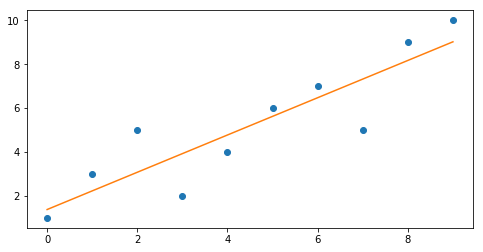

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(10))
y = np.array([1,3,5,2,4,6,7,5,9,10])

b1 = np.sum(x * (y - np.mean(y))) / np.sum(x * (x - np.mean(x)))
b0 = np.mean(y) - b1 * np.mean(x)

f, ax = plt.subplots(figsize = (8,4))
plt.plot(x, y, 'o')
plt.plot(x, b1 * x + b0)

print("회귀계수 b0: {0:.2f} \n회귀계수 b1: {1:.2f}".format(b0, b1))
print("선형함수: y_hat = {0:.2f} * x + {1:.2f}".format(b1, b0))

##### Key sentences
> * in other words, we want to find a $\beta_0$ and a $\beta_1$ such that the resulting line is as close as possible data points.
* By far the most common approach involves minimizing the least squares criterion, and we take that approach in this chapter.
* The least squares approach chooses $\hat{\beta_0}$ and $\hat{\beta_1}$ to minimize the ***RSS***.

### 3.1.2 Assessing the Accuracy of the Coefficient Estimates
---

통계에 대한 내용이 많아요 ... 곧 통계 강의를 듣고 채우겠습니다 ...

### 3.1.3 Assessing the Accuracy of the Model
---
앞서 최소제곱법을 통해 추정한 함수에 대한 평가이다. 2장에서 말했듯이 함수에 대한 평가 지표는 매우 다양하다.

그 중 선형함수를 평가할 때 자주 사용하는 ***RSE(residual standard error)***와 $R^2$에 대해 알아볼 것이다.

#### RSE
RSE는 앞서 배운 **MSE**의 제곱근을 의미한다. 일반적으로 **RMSE(root mean squared error)**로 자주 사용한다.

\begin{equation*}
RSE(RMSE) = \sqrt{\frac{1}{n-2}RSS}
\end{equation*}

위 식을 보면 ***RSE***를 데이터의 개수 $n$이 아닌 $n-2$로 나눈다. 이는 사실, RSS가 $\sigma^2$의 추정으로 사용될 수 있고, $\sigma^2$의 추정에 있어 추정계수만큼 자유도를 감소해야 한다($\sigma^2$는 오류 항에 대한 분산). 하지만, ML함에 있어 만 개 이상의 데이터를 다루는 경우가 많고 10,000으로 나누나 9,998로 나누나 거의 비슷하기 때문에 데이터 개수만큼 나눠서 많이 사용한다. 하지만 RSE 같은 경우 종속변수의 단위에 따라 달라질 수 있어 다양한 데이터 셋을 객관적으로 평가하기 힘들다는 단점이 있다고는 한다. 하지만, 우리는 보통 한 종류의 데이터 셋을 다른 모델로 평가할 때 평가 지표를 사용하기 때문에 단점이 사실상 없다.

#### $R^2$
$R^2$는 비율로 모델을 평가하기 때문에 종속변수에 단위에 상관없이 일관성있는 평가지표이다. 그렇다면 어떤 비율로 모델을 평가할까? 전체 에러 중에 모델이 설명하는 에러 비율을 의미한다. 이때 전체 에러를 실제값과 실제값 평균의 차 즉, 종속변수에 대한 분산으로 정의하며, 이 중 모델이 설명하지 못하는 에러는 예측값과 실제값의 차로 정의한다. 아래 그래프를 보자.

![그림](https://www.researchgate.net/profile/Christian_Gold2/publication/322398615/figure/fig17/AS:581620512903169@1515680544091/Visualization-of-SSE-SSR-SST.png)

(Reference: Modeling of Take-Over Performance in Highly Automated Vehicle Guidance - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Visualization-of-SSE-SSR-SST_fig17_322398615)

위 그래프에서 ***SST(Sum of Total) 또는 TSS***는 잔차를 의미하고, ***SSE***는 ***RSS*** 즉, 우리가 앞서 배운 예측값과 실제값의 차를 의미한다(***SST = TSS***, ***RSS = SSE***). ***SSR***은 ***SST***에서 ***SSE***를 뺀 값이다. $R^2$에서는 $SST$ 대비 우리의 모델이 설명하는 에러 즉, $SSR$의 비율이다.

\begin{equation*}
R^2 = \frac{SSR}{TSS} = \frac{TSS - SSE}{TSS} = 1 - \frac{SSE}{TSS}
\end{equation*}

따라서 $R^2$값은 0과 1사이의 범위를 가지며, 1에 가까울수록 우리의 모델이 종속변수를 잘 설명하고, 0에 가까울수록 우리의 모델이 종속변수를 잘 설명하지 못한다는 의미이다.

그렇다면 $R^2$가 분야에 상관없이 절대적인 지표로 활용될 수 있을까? 아니다! 어떤 분야에선 $R^2$가 0.9정도만 돼도 문제가 있을 수 있지만, 또 다른 분야에선 $R^2$가 0.1 미만이어도 좋은 분석일 수 있다.

## 3.2 Multiple Linear Regression
---
단순 선형회귀는 설명력에 있어서 매우 강력하다. 종속변수에 영향을 미치는 독립변수가 한 개 뿐이니 독립변수가 종속변수에 어떤 영향을 미치는 지 정확하게 확인할 수 있다. 하지만, 현실세계에서 독립변수가 한 개인 상황은 존재하지 않는다. 어떤 현상은 복합적인 요인에 의해 결정된다. 예를 들어, 사람을 구분하는 문제를 푼다고 했을 때, 사람이 키 만으로 결정되지는 않는다. 키, 몸무게, 안경 착용 여부, 머리 색 등등 정말 복합적인 요인이 한 사람을 결정한다. 이처럼 독립변수가 여러개 있을 때, 우리는 다중선형회귀라 한다. 

참고로 다중선형회귀와 다항선형회귀는 다르다. 마치 독립변수가 여러 개 있는 것이 다항선형회귀로 착각하기 쉬운데 다중선형회귀다. 영어로 이해하면 훨씬 쉽다. 다중선형회귀는 **Multiple Linear Regression**, 다항선형회귀는 **Polynomial Linear Regression**이다!

그렇다면 다중선형회귀의 경우 어떻게 접근해야 할까? 우리는 단순 선형회귀를 배웠으니 독립변수의 개수만큼 단순 선형회귀 모델을 만들어 볼 수 있다. 하지만, 이 경우 크게 두 가지 문제가 발생한다. 먼저 독립변수가 $n$개라면 우리의 모델이 $n$개가 된다. 그렇다면 예측문제에서 모델 결정 문제가 발생한다. 둘째, 종속변수는 한 가지 독립변수에 의해서 결정되는 것이 아닌, 여러가지 독립변수에 의해 결정된다. 이때 각 독립변수 별 모델을 만든다면, 나머지 독립변수를 무시하게 된다.

그렇다면 어떻게 선형모델을 작성해야 할까? 아래 식을 보자.

\begin{equation*}
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + ... \beta_pX_p + e
\end{equation*}

위 식에서 $\beta_i$가 의미하는 것은 종속변수 $Y$에 $X_i$가 미치는 영향이다. 중요한 점은 모든 다른 독립변수가 고정됐을 때 미치는 영향이다.

##### Key sentences

>* However, in practice we often have more than one predictor.
* A better approach is to extend the simple linear regression model so that it can directly accommodate multiple predictors.
* We interpret $beta_i$ as the average effect on Y of a one unit increase in $X_i$, holding all other predictors fixed.

### 3.2.1 Estimating the Regression Coefficients
---
다중선형회귀에서 계수 추정은 어렵지 않다. 단순 선형회귀에서 추정했던 것처럼 손실함수를 정의하고, 손실함수를 최소화하는 파라미터를 찾으면 된다. 다중선형회귀 최소제곱법을 통해 손실함수를 정의한다.

\begin{equation*}
RSS = (y_1 - \hat{y}_1)^2 + (y_2 - \hat{y}_2)^2 ... + (y_n - \hat{y}_n)^2
\end{equation*}

***RSS***를 최소화하는 파라미터 역시 편미분을 통해 구할 수 있다. 다만, 모든 계수마다 편미분을 계산하려면 엄청난 시간과 노력이 필요하다. 행렬식을 이용하면 정규 방정식을 통해 쉽고 편하게 계산할 수 있다. 다만, 회귀계수가 많아지면 많아질수록 정규방정식의 계산속도는 기하급수적으로 늘어난다. 고로 딥러닝에서 활용하기에는 부적합하다.

\begin{equation*}
\overrightarrow{Y} = X\overrightarrow{\beta}
\end{equation*}



\begin{equation*}
\overrightarrow{\beta} = (X^TX)^{-1}X^T\overrightarrow{Y}
\end{equation*}

### 3.2.2 Some Important Questions
---
우리가 다중선형회귀를 공부할 때 만나게되는 주요 질문들이 있다.
* 종속변수를 예측할 때 독립변수 중 최소 한 개라도 유용한가? (회귀계수의 적합성 문제)
* 종속변수를 예측할 때 모든 독립변수가 도움이 되는가 또는 독립변수 중 일부만 도움이 되는가?
* 모델이 얼마나 데이터에 잘 적합 됐는가? (모델 평가 문제)
* 우리의 예측은 얼마나 정확할 것인가?